#### About
1. Triangulation using a set of points refers to the subdivision of the plane into triangles, with the points being vertices.
2. A set of points can have many possible triangulations but Delaunay triangulation is better than all.
3. In Delaunay triangulation, triangles are chosen such that no point is inside the circumcircle of any triangle. It doesnt' favour triangles with large angles.
4. Delaunay triangulation forks the concept of Voronoi diagrams which given a set of points transition the space such that the boundary lines are equidistant from neighbouring points. One can get a delaunay triangulation upon connecting the points in neighbouring voronoi regions. In other words, Voronoi diagram on set of points is a subdivision of the plane into cells such that a point q in the cell of p_i if dist(q,pi) < dist(q,pj) for all i!=j where pi lies in subdivision i and pj lies in all other subdivisions
> More 
* Voronoi diagram for 2 point is the perpendicular bisector of line joining them. It subdivides the plane into two.
*  Each voronoi diagram consist of veronoi cells, veronoi edges and veronoi vertices.
*  Delaunay triangulation is the dual graph of voronoi diagram.

In [30]:
#1. Canny edge detector
from scipy import ndimage
from scipy.ndimage.filters import convolve
from scipy import misc
import numpy as np
from PIL import Image, ImageDraw, ImageStat, ImageFilter
from pathlib import Path
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
import numpy as np
import matplotlib.pyplot as plt
import sys

In [36]:
def extract_point(points, threshold, width, height):
    result_img = np.zeros((width, height))
    voronoi_sites = np.empty((0, 2), int)

    #ignoring white box around edge image
    ipoints = points
    for i, p in enumerate(ipoints):
        for j, t in enumerate(p):
            if t > threshold:
                # print('{} , {}'.format(i,j))
                voronoi_sites = np.append(voronoi_sites, [[j, i]], axis=0)
                result_img[j][i] = 255  # j is represeting height
    return result_img, voronoi_sites

In [37]:
def draw_voronoi(sites):
    vor = Voronoi(sites)
    fig, ax = plt.subplots(1, 2, figsize=(8, 16))
    voronoi_plot_2d(vor, ax=ax[1], show_vertices=False, show_points=False)
    ax[1].set_aspect('equal')
    return fig

In [38]:
def draw_delaunay(sites, draw_sites=False):
    tess = Delaunay(sites)
    tri = tess.vertices
    fig, ax = plt.subplots(1, 2)
    ax[1].triplot(sites[:, 0], sites[:, 1], tri, linewidth=0.3, color='black')
    if draw_sites == True:
        ax[1].plot(sites[:, 0], sites[:, 1], 'o')
    ax[1].set_aspect('equal')
    return 

In [35]:
def laplacian_based_approach(img, output_type, width, height):
    # Laplacian edge detector
    img_edges = img.filter(ImageFilter.FIND_EDGES)
    points = list(img_edges.getdata())
    points = [points[(i * width)+1:((i + 1) * width)-1]
              for i in range(1, height-1)]
    pixels, sites = extract_point(points, (30, 30, 30), width, height)
    img = Image.fromarray(pixels)
    if output_type == 'voronoi':
        fig = draw_voronoi(sites)
    elif output_type == 'delaunay':
        fig = draw_delaunay(sites)
    return fig

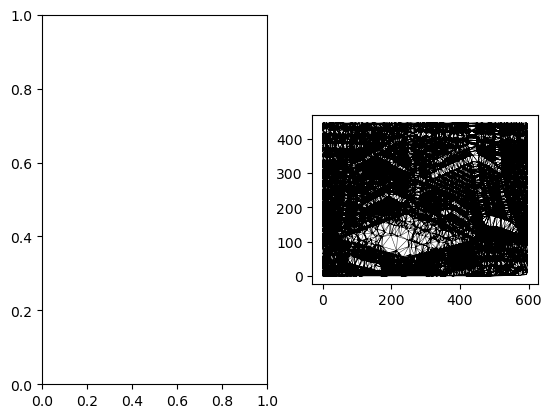

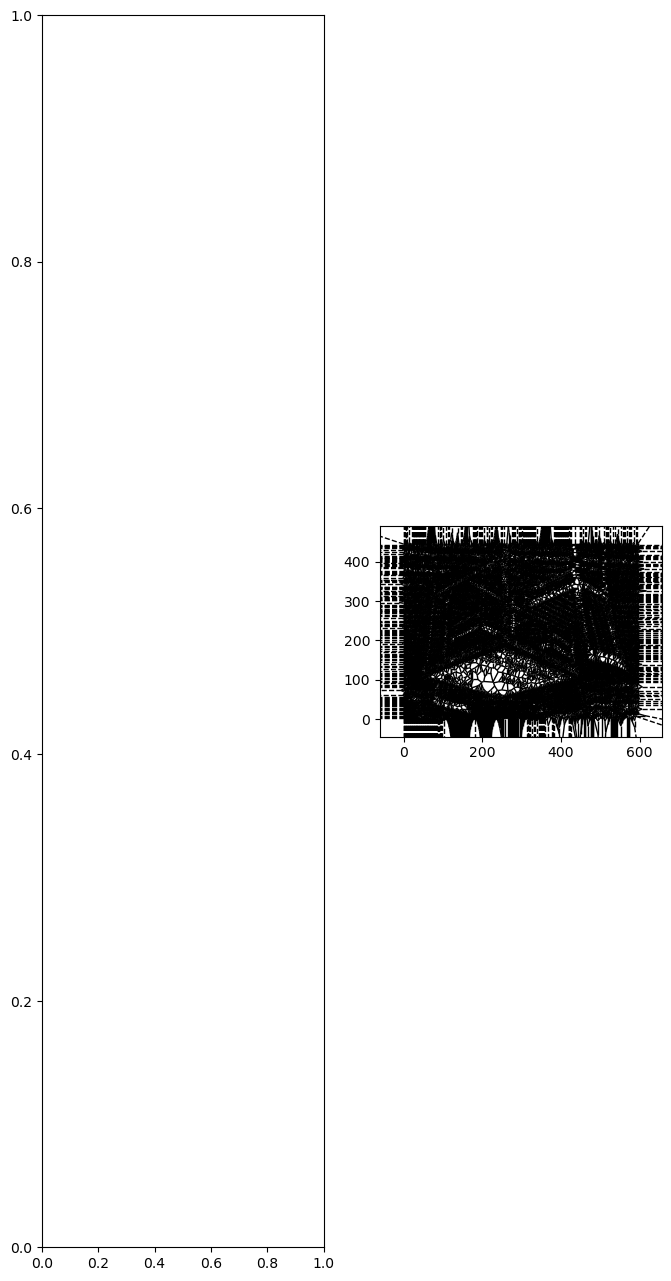

In [42]:
img = Image.open('img.jpg')
w,h = img.size
delaunay_out = laplacian_based_approach(img,'delaunay',w,h)
voronoi_out = laplacian_based_approach(img,'voronoi',w,h)
